## Problem Statement

### Business context

Employee Promotion means the ascension of an employee to higher ranks, this aspect of the job is what drives employees the most. The ultimate reward for dedication and loyalty towards an organization and the HR team plays an important role in handling all these promotion tasks based on ratings and other attributes available.

The HR team in JMD company stored data on the promotion cycle last year, which consists of details of all the employees in the company working last year and also if they got promoted or not, but every time this process gets delayed due to so many details available for each employee - it gets difficult to compare and decide.


### Objective

For the upcoming appraisal cycle, the HR team wants to utilize the stored data and leverage machine learning to make a model that will predict if a person is eligible for promotion or not. You, as a data scientist at JMD company, need to come up with the best possible model that will help the HR team to predict if a person is eligible for promotion or not.


### Data Description

- employee_id: Unique ID for the employee
- department: Department of employee
- region: Region of employment (unordered)
- education: Education Level
- gender: Gender of Employee
- recruitment_channel: Channel of recruitment for employee
- no_ of_ trainings: no of other training completed in the previous year on soft skills, technical skills, etc.
- age: Age of Employee
- previous_ year_ rating: Employee Rating for the previous year
- length_ of_ service: Length of service in years
- awards_ won: if awards won during the previous year then 1 else 0
- avg_ training_ score: Average score in current training evaluations
- is_promoted: (Target) Recommended for promotion

## Importing necessary libraries

In [1]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imbalanced-learn==0.10.1 xgboost==2.0.3 -q --user

In [2]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imbalanced-learn==0.10.1 xgboost==2.0.3 -q --user
# !pip install --upgrade -q threadpoolctl

In [3]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer
from sklearn import metrics

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

## Loading the dataset

In [4]:
# uncomment and run the below code snippets if the dataset is present in the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
employee_promotion = pd.read_csv("/content/drive/MyDrive/Python Course/AdvancedMachineLearning/Project-EmployeePromotion/employee_promotion.csv")

## Data Overview

- Observations
- Sanity checks

In [6]:
# copying data to another varaible to avoid any changes to original data
df=employee_promotion.copy()

### View the first and last 5 rows of the dataset.

In [7]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.000,8,0,49.000,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.000,4,0,60.000,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.000,7,0,50.000,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.000,10,0,50.000,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.000,2,0,73.000,0


In [ ]:
df.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,78.0,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56.0,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,0,79.0,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,NaN,0
54807,51526,HR,region_22,Bachelor's,m,other,1,27,1.0,5,0,49.0,0


### Understand the shape of the dataset.

In [8]:
df.shape

(54808, 13)

### Check the data types of the columns for the dataset.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won            54808 non-null  int64  
 11  avg_training_score    52248 non-null  float64
 12  is_promoted           54808 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 5.4+ MB


### Checking for duplicate values

In [10]:
# let's check for duplicate values in the data
df.duplicated().sum()

np.int64(0)

### Checking for missing values

In [11]:
# let's check for missing values in the data
round(df.isnull().sum() / df.isnull().count() * 100, 2)

,0
employee_id,0.000
department,0.000
region,0.000
education,4.400
gender,0.000
recruitment_channel,0.000
no_of_trainings,0.000
age,0.000
previous_year_rating,7.520
length_of_service,0.000


* `education` column has 4.4% missing values out of the total observations.
* `previous_year_rating` column has 7.52% missing values out of the total observations.
* `avg_training_score` column has 4.67% missing values out of the total observations.

In [ ]:
# list of all categorical variables
cat_col = df.columns

# printing the number of occurrences of each unique value in each categorical column
for column in cat_col:
    print(df[column].value_counts(normalize=True))
    print("-" * 50)

employee_id
51526    0.000018
65438    0.000018
65141    0.000018
7513     0.000018
2542     0.000018
           ...   
60051    0.000018
49017    0.000018
29934    0.000018
28911    0.000018
73202    0.000018
Name: proportion, Length: 54808, dtype: float64
--------------------------------------------------
department
Sales & Marketing    0.307254
Operations           0.207050
Technology           0.130236
Procurement          0.130236
Analytics            0.097650
Finance              0.046271
HR                   0.044118
Legal                0.018957
R&D                  0.018227
Name: proportion, dtype: float64
--------------------------------------------------
region
region_2     0.225204
region_22    0.117282
region_7     0.088363
region_15    0.051233
region_13    0.048314
region_26    0.041235
region_31    0.035305
region_4     0.031072
region_27    0.030269
region_16    0.026730
region_28    0.024048
region_11    0.023993
region_23    0.021438
region_29    0.018136
region_32  

In [12]:
# employee_id is unique for each candidate and might not add value to modeling
df.drop(["employee_id"], axis=1, inplace=True)

In [13]:
# Create a copy of data to perform detailed EDA in the appendix section.
data = df.copy()

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. How is the distribution of average training score of  employee ?
2. How is the distribution age of  employee ?
3. How does the change in length of service (`length_of_service`) vary by the employee's promotion status (`is_promoted`)?
4. How does the previous rating(`previous_year_rating`) vary by the employee's promotion status (`is_promoted`)?
5. What are the attributes that have a strong correlation with each other?



#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [14]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Observations on no_of_trainings

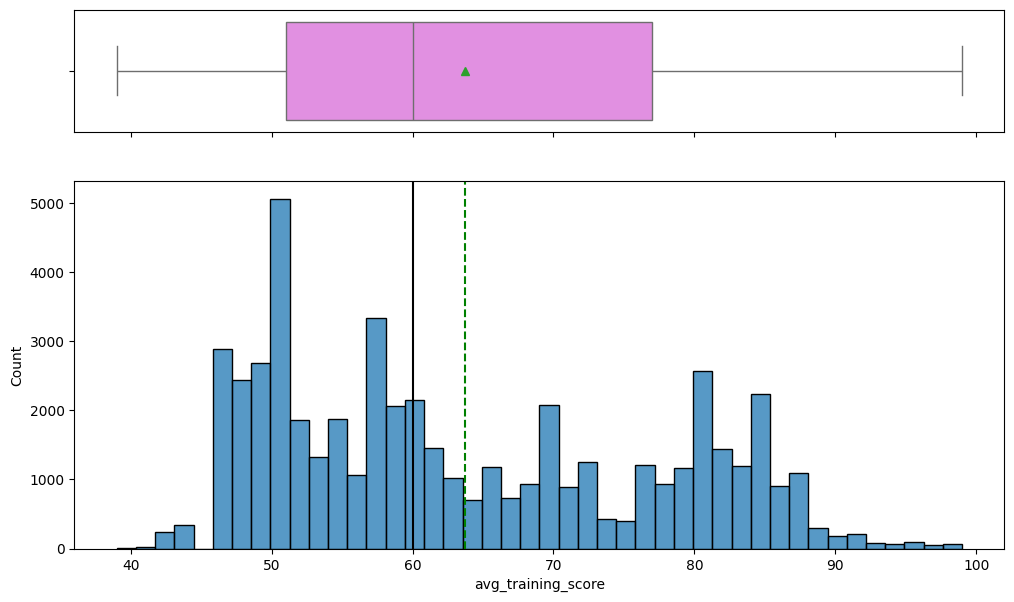

In [15]:
histogram_boxplot(data, "avg_training_score")

### Distribution of Average Training Score

* The values are roughly bell-shaped, centered around the mid-50s.

* Most employees have training scores in the range of 40–70.

* A smaller group of employees have higher scores (80–90+), but they are less common.

* The distribution suggests that the majority of employees perform at an average level, with fewer exceptionally high performers.


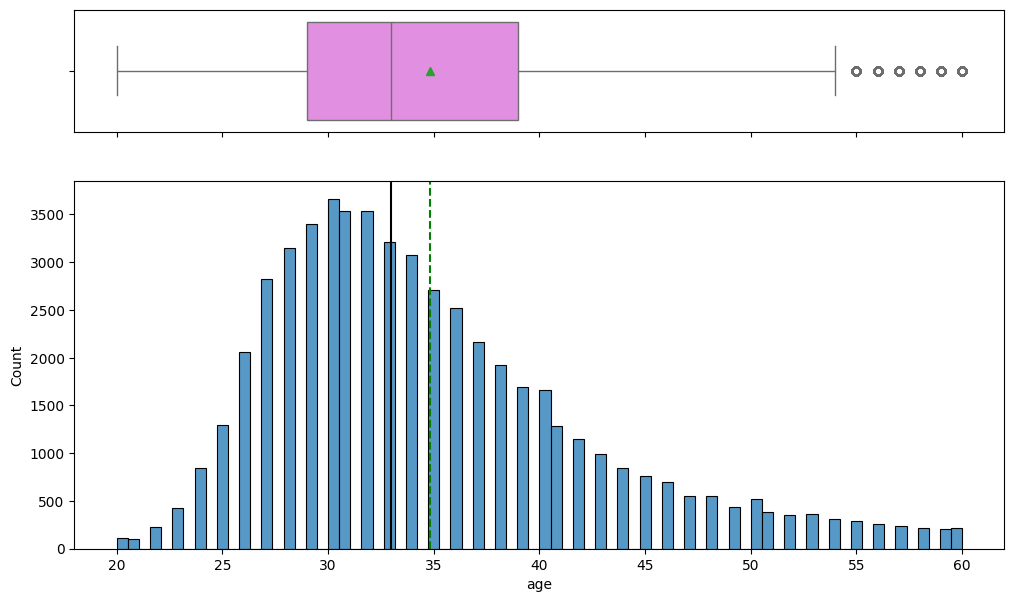

In [16]:
histogram_boxplot(data, "age")

### Distribution of Age

* The age distribution is right-skewed (positively skewed).

* Most employees fall between 25–40 years old.

* There are fewer employees as the age increases beyond 50.

* This indicates a relatively young to mid-career workforce, with a smaller representation of senior employees.

In [17]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [18]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

is_promoted            0     1    All
length_of_service                    
All                50140  4668  54808
3                   6424   609   7033
4                   6238   598   6836
2                   6089   595   6684
5                   5357   475   5832
7                   5087   464   5551
6                   4333   401   4734
1                   4170   377   4547
8                   2614   269   2883
9                   2400   229   2629
10                  1989   204   2193
11                   820    96    916
12                   731    63    794
13                   633    54    687
15                   550    43    593
16                   507    41    548
19                   297    32    329
14                   520    29    549
17                   406    26    432
18                   367    25    392
20                   118    10    128
23                    58     7     65
22                    55     6     61
21                    74     4     78
29          

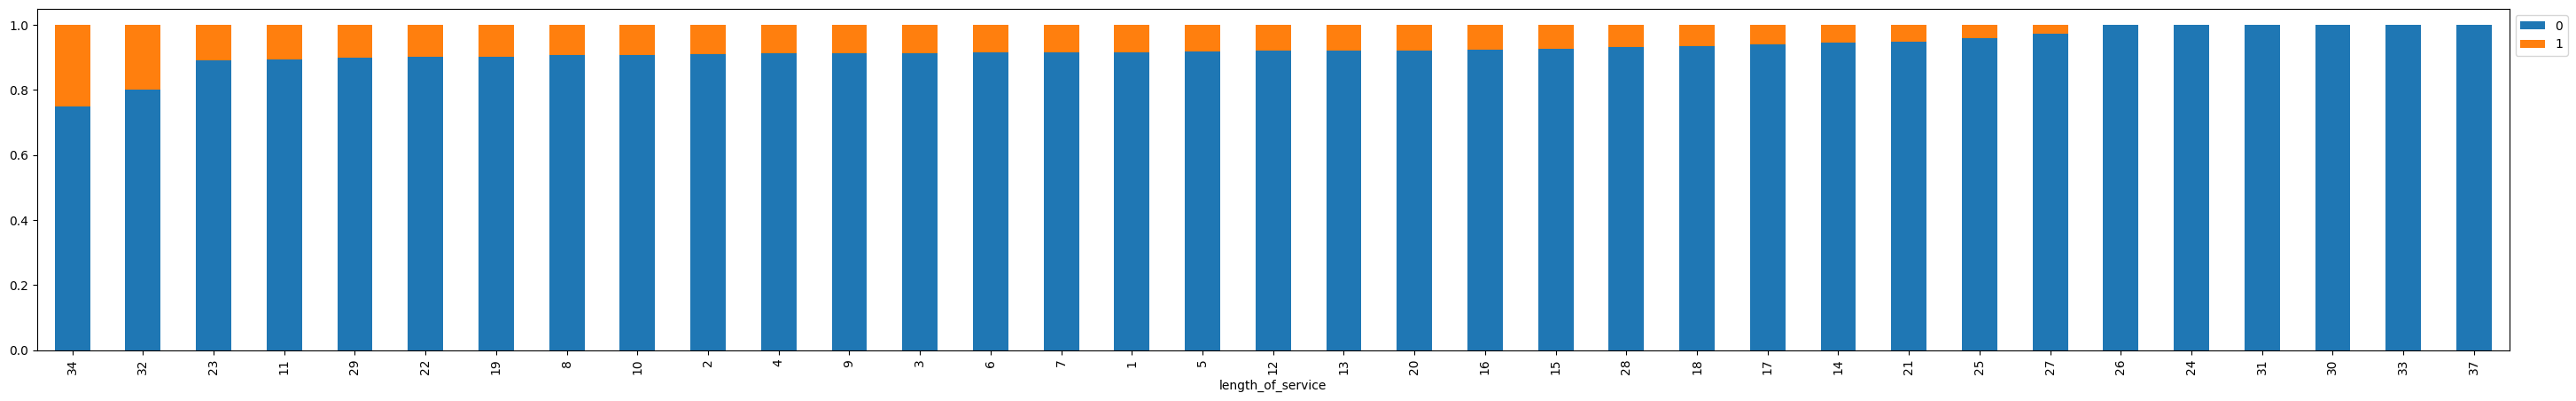

In [19]:
# Length of Service vs Promotion
stacked_barplot(data, predictor="length_of_service", target="is_promoted")

### Length of Service vs Promotion

* Employees with longer service are somewhat more likely to be promoted, but many long-serving employees are not promoted (overlap).

* Newer employees (< 3 years) are rarely promoted.

is_promoted               0     1    All
previous_year_rating                    
 All                  46355  4329  50684
5.000                  9820  1921  11741
3.000                 17263  1355  18618
4.000                  9093   784   9877
2.000                  4044   181   4225
1.000                  6135    88   6223
------------------------------------------------------------------------------------------------------------------------


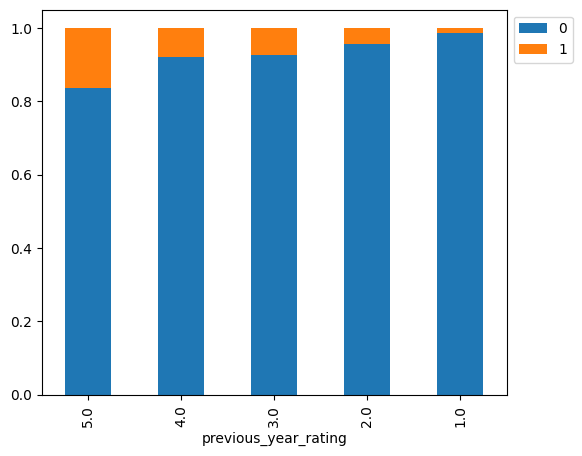

In [20]:
# Previous Year Rating vs Promotion
stacked_barplot(data, predictor="previous_year_rating", target="is_promoted")

### Previous Year Rating vs Promotion

* Strong signal: employees with ratings 4 or 5 dominate promotions.

* Very few promotions from ratings 1 or 2.

In [21]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

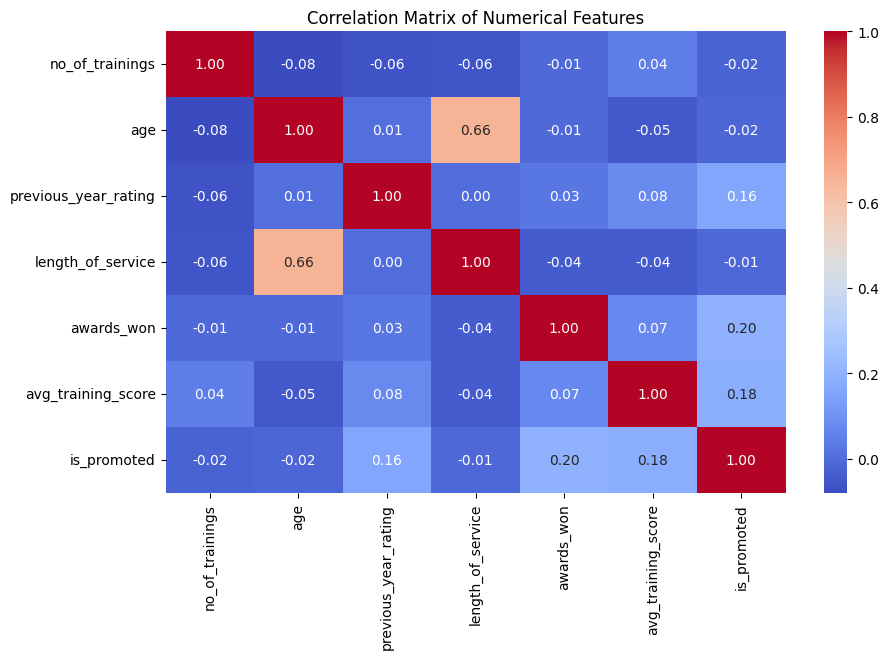

In [22]:
# Correlation matrix (numerical features only)
corr = data.corr(numeric_only=True)

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

### Strong Correlations

* 'age' ↔ 'length_of_service' → 0.66

Older employees tend to have longer service duration.

* 'is_promoted' ↔ 'avg_training_score' → 0.18

Higher training scores are positively associated with promotions.

* 'is_promoted' ↔ 'awards_won' → 0.20 (the strongest single factor for promotion)

Employees who won awards are more likely to be promoted.

* 'is_promoted' ↔ 'previous_year_rating' → 0.16

Higher previous ratings increase promotion chances.

### Data Pre-processing

### Lets convert the columns with an 'object' datatype into categorical variables

In [23]:
for feature in data.columns: # Loop through all columns in the dataframe
    if data[feature].dtype == 'object': # Only apply for columns with categorical strings
        data[feature] = pd.Categorical(data[feature])# Replace strings with an integer
data.head(10)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.000,8,0,49.000,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.000,4,0,60.000,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.000,7,0,50.000,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.000,10,0,50.000,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.000,2,0,73.000,0
5,Analytics,region_2,Bachelor's,m,sourcing,2,31,3.000,7,0,85.000,0
6,Operations,region_20,Bachelor's,f,other,1,31,3.000,5,0,59.000,0
7,Operations,region_34,Master's & above,m,sourcing,1,33,3.000,6,0,63.000,0
8,Analytics,region_20,Bachelor's,m,other,1,28,4.000,5,0,83.000,0
9,Sales & Marketing,region_1,Master's & above,m,sourcing,1,32,5.000,5,0,54.000,0


In [24]:
print(data.department.value_counts())
print(data.region.value_counts())
print(data.education.value_counts())
print(data.gender.value_counts())
print(data.recruitment_channel.value_counts())

department
Sales & Marketing    16840
Operations           11348
Procurement           7138
Technology            7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: count, dtype: int64
region
region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: count, dtype: int64
education
Bachelor's          36669
Maste

In [25]:
# we need to pass numerical values for each categorical column for imputation so we will label encode them
replaceStruct = {
                "education":     {"Below Secondary": 1, "Bachelor's": 2 ,"Master's & above": 3}
                    }
oneHotCols=["department","region","education","gender", "recruitment_channel"
           ]

In [26]:
data=data.replace(replaceStruct)
data=pd.get_dummies(data, columns=oneHotCols)
data.head(10)

,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,region_region_1,region_region_10,region_region_11,region_region_12,region_region_13,region_region_14,region_region_15,region_region_16,region_region_17,region_region_18,region_region_19,region_region_2,region_region_20,region_region_21,region_region_22,region_region_23,region_region_24,region_region_25,region_region_26,region_region_27,region_region_28,region_region_29,region_region_3,region_region_30,region_region_31,region_region_32,region_region_33,region_region_34,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_2,education_1,education_3,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,1,35,5.000,8,0,49.000,0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,False,False,True
1,1,30,5.000,4,0,60.000,0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False
2,1,34,3.000,7,0,50.000,0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True
3,2,39,1.000,10,0,50.000,0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False
4,1,45,3.000,2,0,73.000,0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False
5,2,31,3.000,7,0,85.000,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True
6,1,31,3.000,5,0,59.000,0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False
7,1,33,3.000,6,0,63.000,0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,True
8,1,28,4.000,5,0,83.000,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False
9,1,32,5.000,5,0,54.000,0,False,False,False,False,False,False,Fal

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 58 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   no_of_trainings               54808 non-null  int64  
 1   age                           54808 non-null  int64  
 2   previous_year_rating          50684 non-null  float64
 3   length_of_service             54808 non-null  int64  
 4   awards_won                    54808 non-null  int64  
 5   avg_training_score            52248 non-null  float64
 6   is_promoted                   54808 non-null  int64  
 7   department_Analytics          54808 non-null  bool   
 8   department_Finance            54808 non-null  bool   
 9   department_HR                 54808 non-null  bool   
 10  department_Legal              54808 non-null  bool   
 11  department_Operations         54808 non-null  bool   
 12  department_Procurement        54808 non-null  bool   
 13  d

* Values have been encoded.
- We will do missing value imputation after splitting the data into train, test and validation to avoid data leakage

### Data Preparation for Modeling

In [28]:
X = data.drop(["is_promoted"], axis=1)
y = data["is_promoted"]

In [29]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(32884, 57) (10962, 57) (10962, 57)


In [30]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in validation data =", X_val.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 32884
Number of rows in validation data = 10962
Number of rows in test data = 10962


### Missing Value Treatment

In [31]:
data.isnull().sum()

,0
no_of_trainings,0
age,0
previous_year_rating,4124
length_of_service,0
awards_won,0
avg_training_score,2560
is_promoted,0
department_Analytics,0
department_Finance,0
department_HR,0


In [32]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Get list of categorical and numerical columns
cat_cols = list(X_train.select_dtypes(include='object').columns)
num_cols = list(X_train.select_dtypes(include=['int', 'float']).columns)



# Impute numerical columns
num_imputer = SimpleImputer(strategy='mean')
X_train[num_cols] = num_imputer.fit_transform(X_train[num_cols])
X_val[num_cols] = num_imputer.transform(X_val[num_cols])
X_test[num_cols] = num_imputer.transform(X_test[num_cols])

In [33]:
# Checking that no column has missing values in train, validation or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

no_of_trainings                 0
age                             0
previous_year_rating            0
length_of_service               0
awards_won                      0
avg_training_score              0
department_Analytics            0
department_Finance              0
department_HR                   0
department_Legal                0
department_Operations           0
department_Procurement          0
department_R&D                  0
department_Sales & Marketing    0
department_Technology           0
region_region_1                 0
region_region_10                0
region_region_11                0
region_region_12                0
region_region_13                0
region_region_14                0
region_region_15                0
region_region_16                0
region_region_17                0
region_region_18                0
region_region_19                0
region_region_2                 0
region_region_20                0
region_region_21                0
region_region_

* All missing values have been treated.


## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model.
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [34]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

In [35]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Initial Model Building

### Model Building with original data

In [36]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))

print("\nTraining Performance:\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\nValidation Performance:\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 0.8596428571428572
Random forest: 0.9996428571428572
GBM: 0.2775
Adaboost: 0.1325
dtree: 1.0

Validation Performance:

Bagging: 0.30620985010706636
Random forest: 0.21627408993576017
GBM: 0.2751605995717345
Adaboost: 0.12955032119914348
dtree: 0.3993576017130621


In [37]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_train = recall_score(y_train, model.predict(X_train))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference1 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference1))


Training and Validation Performance Difference:

Bagging: Training Score: 0.8596, Validation Score: 0.3062, Difference: 0.5534
Random forest: Training Score: 0.9996, Validation Score: 0.2163, Difference: 0.7834
GBM: Training Score: 0.2775, Validation Score: 0.2752, Difference: 0.0023
Adaboost: Training Score: 0.1325, Validation Score: 0.1296, Difference: 0.0029
dtree: Training Score: 1.0000, Validation Score: 0.3994, Difference: 0.6006


- GBM is the most stable model, even if the accuracy is low. Overfitting models like Random Forest and Bagging should be avoided

### Model Building with Oversampled data


In [39]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 2800
Before Oversampling, counts of label 'No': 30084 

After Oversampling, counts of label 'Yes': 30084
After Oversampling, counts of label 'No': 30084 

After Oversampling, the shape of train_X: (60168, 57)
After Oversampling, the shape of train_y: (60168,) 



In [40]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_train_over, model.predict(X_train_over))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9910251296370164
Random forest: 0.999900279218189
GBM: 0.8813655099055977
Adaboost: 0.8552054248105305
dtree: 0.9998670389575854

Validation Performance:

Bagging: 0.3083511777301927
Random forest: 0.2366167023554604
GBM: 0.3222698072805139
Adaboost: 0.4068522483940043
dtree: 0.3747323340471092


In [41]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores_train = recall_score(y_train_over, model.predict(X_train_over))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference2 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference2))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9910, Validation Score: 0.3084, Difference: 0.6827
Random forest: Training Score: 0.9999, Validation Score: 0.2366, Difference: 0.7633
GBM: Training Score: 0.8814, Validation Score: 0.3223, Difference: 0.5591
Adaboost: Training Score: 0.8552, Validation Score: 0.4069, Difference: 0.4484
dtree: Training Score: 0.9999, Validation Score: 0.3747, Difference: 0.6251


- AdaBoost is the least overfitting and has slightly better validation performance. AdaBoost is the most balanced model after oversampling.

### Model Building with Undersampled data

In [42]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [43]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 2800
Before Under Sampling, counts of label 'No': 30084 

After Under Sampling, counts of label 'Yes': 2800
After Under Sampling, counts of label 'No': 2800 

After Under Sampling, the shape of train_X: (5600, 57)
After Under Sampling, the shape of train_y: (5600,) 



In [44]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train_un, model.predict(X_train_un))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9667857142857142
Random forest: 1.0
GBM: 0.6467857142857143
Adaboost: 0.7364285714285714
dtree: 1.0

Validation Performance:

Bagging: 0.6102783725910065
Random forest: 0.6755888650963597
GBM: 0.6252676659528907
Adaboost: 0.7376873661670236
dtree: 0.658458244111349


In [45]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores_train = recall_score(y_train_un, model.predict(X_train_un))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference3 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference3))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9668, Validation Score: 0.6103, Difference: 0.3565
Random forest: Training Score: 1.0000, Validation Score: 0.6756, Difference: 0.3244
GBM: Training Score: 0.6468, Validation Score: 0.6253, Difference: 0.0215
Adaboost: Training Score: 0.7364, Validation Score: 0.7377, Difference: -0.0013
dtree: Training Score: 1.0000, Validation Score: 0.6585, Difference: 0.3415


- AdaBoost with undersampled data is the best model among all three sampling strategies so far

### HyperparameterTuning
# Selected models (which to tune )
- AdaBoostClassifier model with Undersampled data: Best current validation (Val = 0.7377) with almost zero gap. Tuning and the base estimator can still squeeze additional, reliable gains without overfitting.
- Gradient Boosting model with Undersampled Data: Quite well balanced (Train = 0.6468, Val = 0.6253, gap ≈ 0.0215) but absolute performance is lower than AdaBoost.
- Gradient Boosting model with Oversampled data: The model(Train = 0.8814,Validation = 0.3223, Gap ≈ 0.5591 → clear overfitting)
) is learning too much from oversampled data, which often introduces noise and duplicates. Hyperparameter tuning can help by regularizing the model and improving generalization.

### Tuning AdaBoostClassifier model with Undersampled data

In [46]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(10, 40, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': np.int64(30), 'learning_rate': 1, 'estimator': DecisionTreeClassifier(max_depth=1, random_state=1)} with CV score=0.6989285714285713:
CPU times: user 1.44 s, sys: 115 ms, total: 1.55 s
Wall time: 38.1 s


In [47]:
tuned_adb = AdaBoostClassifier(
    random_state=1,
    n_estimators=20,
    learning_rate=0.01,
    estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
)
tuned_adb.fit(X_train_un, y_train_un)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2,
                                                    random_state=1),
                   learning_rate=0.01, n_estimators=20, random_state=1)

In [48]:
# Checking model's performance on training set
adb_train = model_performance_classification_sklearn(tuned_adb, X_train_un, y_train_un)
adb_train

,Accuracy,Recall,Precision,F1
0,0.646,0.494,0.710,0.583


In [63]:
# Checking model's performance on validation set
adb_val = model_performance_classification_sklearn(tuned_adb, X_val, y_val)
adb_val

,Accuracy,Recall,Precision,F1
0,0.771,0.497,0.185,0.270


### Tuning  Gradient Boosting model with Undersampled Data

In [49]:
%%time

#Creating pipeline
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
        "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],

}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.5, 'n_estimators': np.int64(100), 'max_features': 0.7, 'learning_rate': 1, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.6775:
CPU times: user 2.74 s, sys: 180 ms, total: 2.92 s
Wall time: 2min 11s


In [50]:
tuned_gbm1 = GradientBoostingClassifier(
    random_state=1,
    subsample=1,
    n_estimators=150,
    max_features=0.5,
    learning_rate=0.01,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm1.fit(X_train_un, y_train_un)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.01, max_features=0.5,
                           n_estimators=150, random_state=1, subsample=1)

In [51]:
# Checking model's performance on training set
gbm1_train = model_performance_classification_sklearn(
    tuned_gbm1, X_train_un, y_train_un
)
gbm1_train

,Accuracy,Recall,Precision,F1
0,0.705,0.586,0.770,0.665


In [64]:
# Checking model's performance on validation set
gbm1_val = model_performance_classification_sklearn(tuned_gbm1, X_val, y_val)
gbm1_val

,Accuracy,Recall,Precision,F1
0,0.809,0.588,0.243,0.344


### Tuning Gradient Boosting model with Oversampled data

In [52]:
%%time

#defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {


        "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 1, 'n_estimators': np.int64(100), 'max_features': 0.5, 'learning_rate': 0.05, 'init': DecisionTreeClassifier(random_state=1)} with CV score=0.932324786111337:
CPU times: user 16 s, sys: 1.53 s, total: 17.5 s
Wall time: 21min 54s


In [53]:
tuned_gbm2 = GradientBoostingClassifier(
    random_state=1,
    subsample=0.7,
    n_estimators=125,
    max_features=1,
    learning_rate=1,
    init=DecisionTreeClassifier(random_state=1),
)
tuned_gbm2.fit(X_train_over, y_train_over)

GradientBoostingClassifier(init=DecisionTreeClassifier(random_state=1),
                           learning_rate=1, max_features=1, n_estimators=125,
                           random_state=1, subsample=0.7)

In [54]:
# Checking model's performance on training set
gbm2_train = model_performance_classification_sklearn(tuned_gbm1, X_train_over, y_train_over)
gbm2_train

,Accuracy,Recall,Precision,F1
0,0.720,0.613,0.779,0.686


In [60]:
# Checking model's performance on validation set
gbm2_val = model_performance_classification_sklearn(tuned_gbm1, X_val, y_val)
gbm2_val

,Accuracy,Recall,Precision,F1
0,0.809,0.588,0.243,0.344


## Model Comparison and Final Model Selection

In [61]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        gbm1_train.T,
        gbm2_train.T,
        adb_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Gradient boosting trained with Undersampled data",
    "Gradient boosting trained with Oversampled data",
    "AdaBoost trained with Undersampled data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Gradient boosting trained with Undersampled data,Gradient boosting trained with Oversampled data,AdaBoost trained with Undersampled data
Accuracy,0.705,0.720,0.646
Recall,0.586,0.613,0.494
Precision,0.770,0.779,0.710
F1,0.665,0.686,0.583


In [65]:
# Validation performance comparison

models_train_comp_df = pd.concat(
    [ gbm1_val.T, gbm2_val.T, adb_val.T], axis=1,
)
models_train_comp_df.columns = [
    "Gradient boosting trained with Undersampled data",
    "Gradient boosting trained with Oversampled data",
    "AdaBoost trained with Undersampled data",
]
print("Validation performance comparison:")
models_train_comp_df

Validation performance comparison:


,Gradient boosting trained with Undersampled data,Gradient boosting trained with Oversampled data,AdaBoost trained with Undersampled data
Accuracy,0.809,0.809,0.771
Recall,0.588,0.588,0.497
Precision,0.243,0.243,0.185
F1,0.344,0.344,0.270


- GBM with undersampling and oversampling give identical validation performance:  Because it performs equally well on validation as the undersampled version, but shows stronger training behavior (less bias).


### Test set final performance

In [69]:
# Let's check the performance on test set
#ada_test = model_performance_classification_sklearn(tuned_adb, X_test, y_test)
#ada_test

gbm2_test = model_performance_classification_sklearn(tuned_gbm2, X_test, y_test)
gbm2_test

,Accuracy,Recall,Precision,F1
0,0.877,0.361,0.311,0.334


# Conclusion from Test result
- While GBM with Oversampled Data had the best validation results, on the test set it shows poor minority-class performance (low precision & recall, low F1).
- The high accuracy (0.877) does not reflect true performance because of imbalance.
- This suggests the model still overfits oversampled data and doesn’t generalize well on real-world class distribution.


### Feature Importance

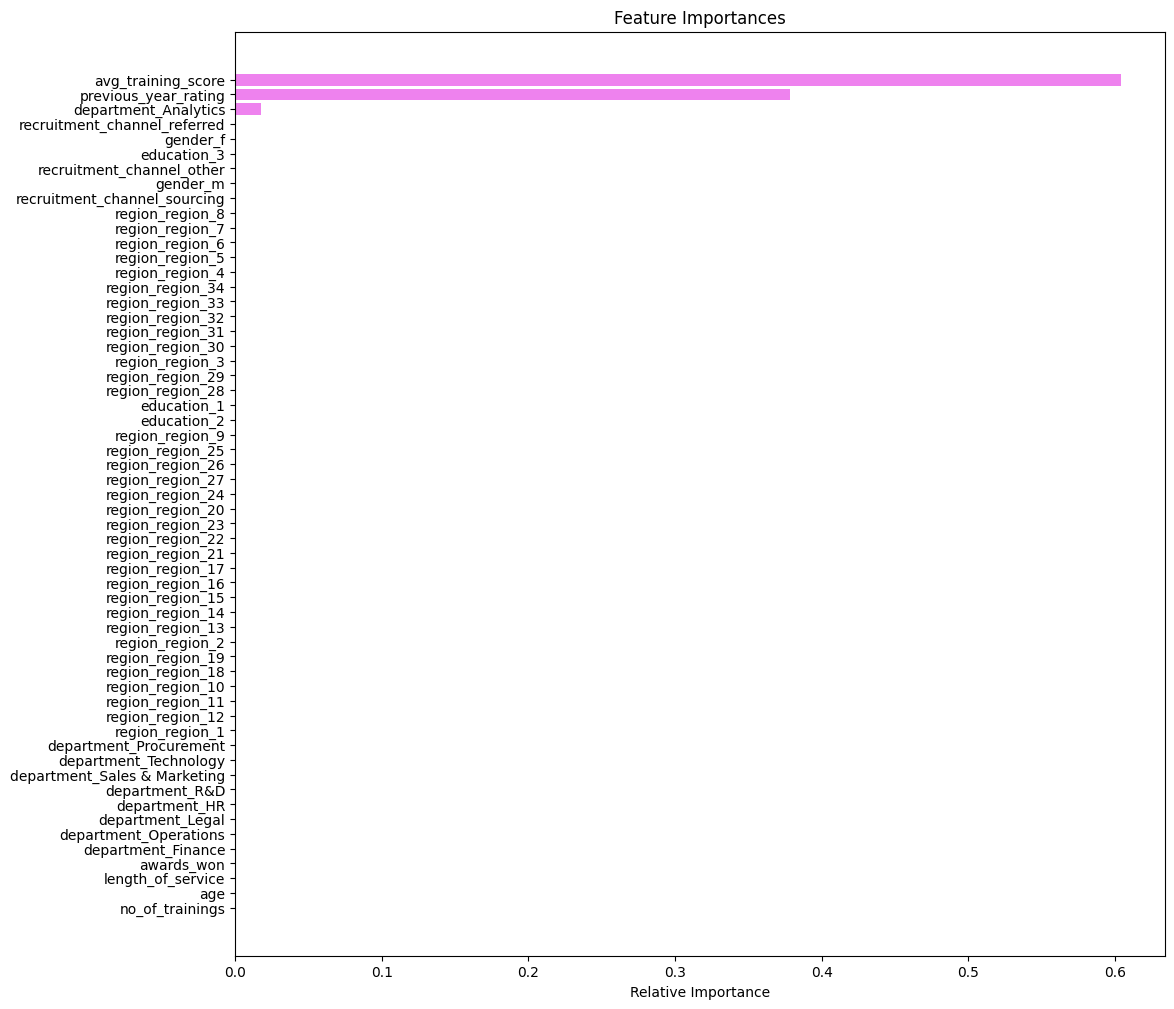

In [67]:
feature_names = X_train.columns
importances = tuned_adb.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

# Business Insights and Conclusions

# Insights from Data & Modeling
1.	Severe Class Imbalance
-	Very few employees are promoted compared to the majority not promoted .

2.	Key Features Driving Promotion
-	Previous Year Rating and Average Training Score were strong predictors. Employees with higher scores/ratings are significantly more likely to be promoted.
-	Awards Won also positively correlates with promotions, though only a small fraction of employees win awards.
-	Length of Service and Number of Trainings have weaker predictive power; many long-tenured employees are not necessarily promoted.
3.	Demographic Neutrality
-	Gender, region, and recruitment channel have limited impact on promotions , suggesting promotions are performance-driven rather than biased on demographic attributes.
4.	Training vs Performance Gap
-	Employees often undergo multiple trainings, but not all with high scores get promoted. Indicates that training quality/performance scores matter more than quantity of trainings.
5.	Model Performance Observations
-	Gradient Boosting with oversampled data performed best .
- Many deserving employees (positives) are being missed, which could indicate promotion policies are too restrictive or evaluation is noisy.



# Actionable Business Recommendations
1.	Improve Promotion Identification
-	Current policies miss many high-potential employees.
-	Recommendation: review promotion criteria and consider additional qualitative performance indicators (peer feedback, project impact, innovation) beyond training scores and ratings.
2.	Balanced Training & Development Programs
-	Employees with higher training scores are more likely to be promoted.
-	Recommendation: introduce targeted learning paths (instead of generic trainings) that directly improve skills aligned with promotion requirements.
3.	Recognition & Rewards
-	Employees winning awards have higher promotion chances.
-	Recommendation: expand recognition programs so more employees are acknowledged, and link recognitions more transparently to promotion decisions.
4.	Retention of High-Potential Employees
-	Many employees with long service are not promoted, which could lead to disengagement.
-	Recommendation: introduce career progression tracks (lateral moves, mentoring roles) for experienced employees who may not be in the direct promotion path.


***